In [5]:
import numpy as np
import pandas as pd
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy.fft as fft

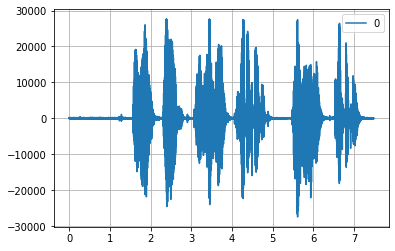

In [2]:
filename = "conversation.wav"
data = scipy.io.wavfile.read(filename) #lecture du fichier .wav
sampling_rate = data[0]
duration = len(data[1]) / float(sampling_rate)
t = np.arange(0, duration, 1/float(sampling_rate)) 
df = pd.DataFrame(data[1], index=t) #affichage de la forme d'onde
df.plot(grid=True)
plt.show()

-134.4635030283476 59.331475542933546


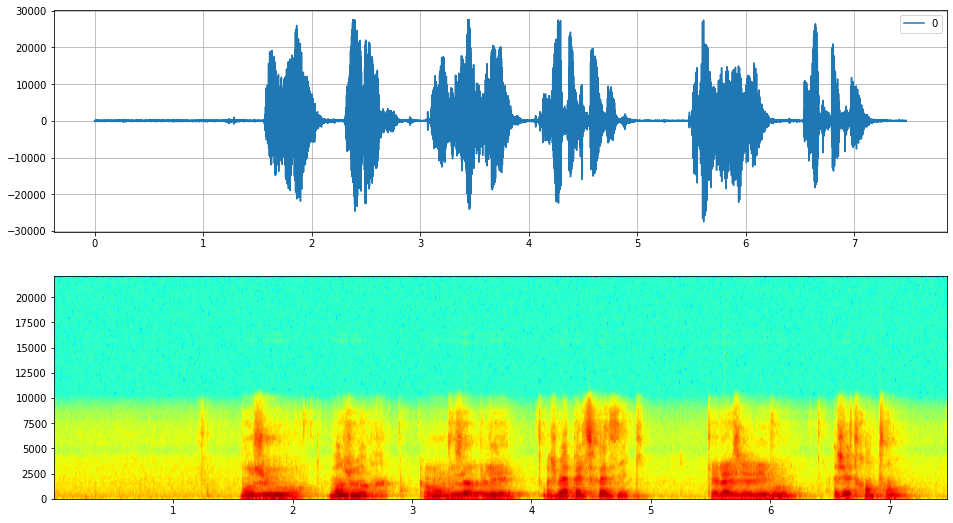

In [3]:
plt.figure(figsize=(16,9))
ax = plt.subplot(2,1,1)
df.plot(ax=ax, grid=True)
ax = plt.subplot(2,1,2)
sp, sp_f, sp_t, sp_ax = ax.specgram(df[0], Fs=sampling_rate, cmap='jet') #affichage du spectrogramme
min_val = 10*np.log10(sp.min())
max_val = 10*np.log10(sp.max())
print( min_val, max_val)

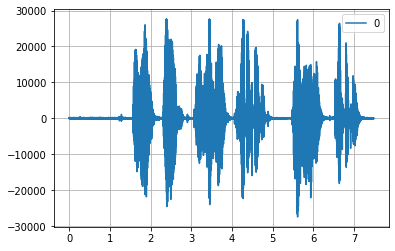

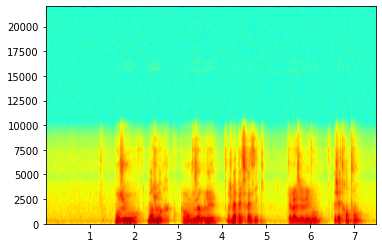

0.0 7.4799773242630385 329868 2.2675668219600078e-05 44100.13369024486


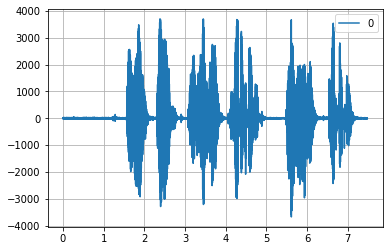

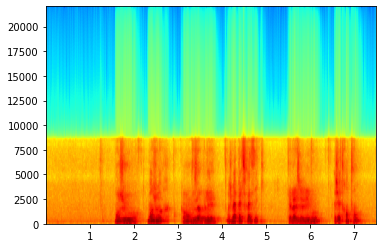

In [16]:
filename = "conversation.wav"
data = scipy.io.wavfile.read(filename) #lecture du fichier
sampling_rate = data[0]
duration = len(data[1])/float(sampling_rate)
t = np.arange(0, duration, 1/float(sampling_rate))
df = pd.DataFrame(data[1], index=t) #affichage de la forme d'onde
df.plot(grid=True)
plt.show()
plt.figure(figsize=(13,4))
for channel in df.columns:
    ax = plt.subplot(1,2,channel+1)
    plt.specgram( df[channel], Fs=sampling_rate, cmap='jet') #affichage du spectrogramme
plt.show()
# le bruit est constant, donc on considere son periode égal à la taille du signal
Tmin = df.index[0]
Tmax = df.index[-1]
N = len(df)
step = (Tmax - Tmin) / N
fe = 1/step
f = np.arange(-fe/2,fe/2, fe/N )
print(Tmin, Tmax, N, step, fe)
cutting_frequency = 8500.0
rect = pd.Series(0.0, index=f)
rect[-cutting_frequency:cutting_frequency] = 1.0 
filtered_df = pd.DataFrame( index=t )
for channel in df.columns:
    S = 1/(Tmax - Tmin) * fft.fft(df[channel]) # calcul de la transformation
    S_shift = fft.fftshift(S) # shift pour avoir la freuqence zero au centre du spectre
    S_shift_filt = S_shift * rect
    S_filt = fft.ifftshift(S_shift_filt)
    filtered_df[channel] = np.real( fft.ifft(S_filt) )
filtered_df.plot(grid=True)
plt.show()
plt.figure(figsize=(13,4))
for channel in filtered_df.columns:
    ax = plt.subplot(1,2,channel+1)
    plt.specgram( filtered_df[channel], Fs=sampling_rate, cmap='jet') #affichage du spect sans le silence
plt.show()


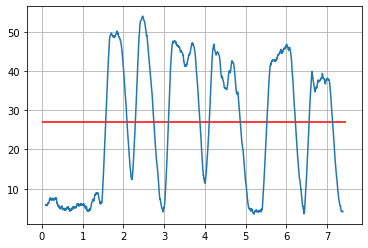

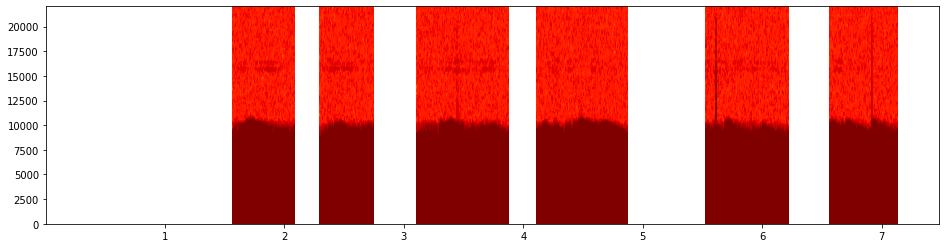

In [17]:
sp_df = pd.DataFrame( 10*np.log10(sp.T), index=sp_t, columns=sp_f)
mean_sp = sp_df.mean()
ff = mean_sp.idxmax()
son_th = sp_df[ff].median() #calcule de la mediane pour segmenter le spectr
ff_s = sp_df[ff].rolling(64, center=True).mean()
ff_s.plot(grid=True)
plt.hlines([son_th], ff_s.index[0], ff_s.index[-1], 'r')
son = ff_s > son_th
son_sp = sp_df.copy()
son_sp[son == False] = np.nan
plt.figure(figsize=(16,4))
plt.contourf( son_sp.index, son_sp.columns, son_sp.T, 256, cmap='jet', vmin=-220, vmax=-30)

